In [7]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [10]:
data = load_wine()
wine = pd.DataFrame(data.data,columns = data.feature_names)
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [47]:
x = wine.iloc[:,:]

In [17]:
scale = StandardScaler()
scale.fit(x)
x1 = scale.transform(x)


In [51]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=5)
Kmeans.fit(x1)
Kmeans.cluster_centers_

array([[ 0.18654314,  0.90497145,  0.24921026,  0.58370348, -0.05063539,
        -0.988557  , -1.23619475,  0.71684172, -0.74960756,  0.98849829,
        -1.19129878, -1.30153966, -0.38004461],
       [ 1.00189888, -0.3933875 ,  0.28998625, -0.82681502,  0.45532242,
         0.90695125,  0.99106116, -0.61547323,  0.55710852,  0.26126604,
         0.50538663,  0.76993255,  1.28020598],
       [-0.86803428, -0.55807462, -0.77019093,  0.08462042, -0.72644296,
        -0.4057935 , -0.23158   ,  0.27551717, -0.44041086, -0.92738845,
         0.41176441,  0.08762165, -0.82555483],
       [-0.7857181 , -0.02079571, -0.53723057, -0.30013163,  0.08835836,
         0.66114589,  0.57071252, -0.78043021,  1.08392085, -0.65550038,
         0.26047079,  0.58956142, -0.37760159],
       [-0.69363471,  0.0873319 ,  1.5778826 ,  1.65308575,  0.6947463 ,
         0.29770796,  0.49541502,  0.25609667,  0.20867519, -0.72589131,
         0.7410838 ,  0.56644872, -0.49296711]])

In [52]:
x1.shape

(178, 13)

In [53]:
y_pred = Kmeans.predict(x1)
y_pred

array([1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 2, 3, 2, 4, 2, 4, 3, 2, 2, 2, 3, 4, 2, 3, 2, 0, 3, 2, 2, 4,
       2, 2, 2, 2, 2, 3, 3, 3, 4, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 3, 3, 2, 2, 4, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

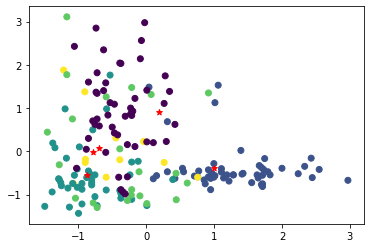

In [54]:
import matplotlib.pyplot as plt
plt.scatter(x1[:,12],x1[:,1],c=y_pred)
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],marker = "*", c = 'red')
